In [1]:
# Data representation and computation
import pandas as pd  
import numpy as np  
pd.options.display.float_format = '{:20,.4f}'.format

# Graph plotting
import matplotlib.pyplot as plt  
import seaborn as sns

# prophet by Facebook
from fbprophet import Prophet

# Miscellaneous
import warnings
from math import log, e, ceil
from scipy.stats import entropy
#from prettytable import PrettyTable

# Declaration
warnings.filterwarnings('ignore')
%precision 2
%matplotlib inline
sns.set(font_scale=1)

In [2]:
file_path = "Sales_Data - Only the columns we need.csv"
sales_df = pd.read_csv(file_path)
sales_df.head()


,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,07/04/2013,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [3]:
sales_df.shape

(35948, 16)

In [4]:
# The data is of a particular time period. 
# To read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

In [5]:
sales_df = pd.read_csv(file_path, parse_dates=['InvDate'], date_parser = dateparse)
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [6]:
sales_df.shape

(35948, 16)

In [7]:
sales_df.describe()

,YEAR_,MONTH_,Product,Real_Qty,CAD_Value
count,"35,948.0000","35,948.0000","35,948.0000","35,948.0000","35,948.0000"
mean,"2,016.8881",6.5288,"600,743.3911",60.0658,"4,029.2229"
std,2.5006,3.2983,313.4058,327.3413,"13,568.9165"
min,"2,013.0000",1.0000,"600,007.0000",1.0000,0.0000
25%,"2,015.0000",4.0000,"600,627.0000",2.0000,130.7000
50%,"2,017.0000",6.0000,"600,773.5000",5.0000,490.5600
75%,"2,019.0000",9.0000,"600,919.0000",28.0000,"2,105.5760"
max,"2,021.0000",12.0000,"601,307.0000","11,520.0000","261,584.6400"


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR_        35948 non-null  int64         
 1   MONTH_       35948 non-null  int64         
 2   InvDate      35948 non-null  datetime64[ns]
 3   InvNumber    35948 non-null  object        
 4   Market       35948 non-null  object        
 5   InvCustomer  35948 non-null  object        
 6   CompanyName  35948 non-null  object        
 7   ItemClass    35948 non-null  object        
 8   SubCategory  35948 non-null  object        
 9   Flavours     35948 non-null  object        
 10  Product      35948 non-null  int64         
 11  Description  35948 non-null  object        
 12  Config       35948 non-null  object        
 13  UOM          35948 non-null  object        
 14  Real_Qty     35948 non-null  int64         
 15  CAD_Value    35948 non-null  float64       
dtypes: d

In [9]:
sales_df.isna().sum()

YEAR_          0
MONTH_         0
InvDate        0
InvNumber      0
Market         0
InvCustomer    0
CompanyName    0
ItemClass      0
SubCategory    0
Flavours       0
Product        0
Description    0
Config         0
UOM            0
Real_Qty       0
CAD_Value      0
dtype: int64

In [10]:
sales_df.groupby('SubCategory')['CAD_Value'].describe()

,count,mean,std,min,25%,50%,75%,max
SubCategory,,,,,,,,
CHOC,"1,102.0000","2,182.6657","5,869.2311",0.0000,268.1800,536.3600,"2,395.8264","95,988.0000"
F&N,"30,261.0000","4,399.6510","14,199.5907",0.0000,134.0900,536.3600,"2,227.4560","261,584.6400"
GRAN,"3,388.0000","1,538.4345","6,225.9932",0.0000,9.1000,34.5600,777.6000,"94,027.2000"
LSUG,647.0000,278.9067,407.2594,0.0000,100.8000,201.1400,302.4000,"6,350.4000"
PROT,550.0000,"7,103.0887","23,553.7860",0.0000,166.4000,456.7680,998.4000,"176,256.0000"


In [11]:
sales_df.groupby('SubCategory')['Real_Qty','CAD_Value'].sum()
#sales.df.groupby('Market')['Customers', 'Sales'].sum()

,Real_Qty,CAD_Value
SubCategory,,
CHOC,19222,"2,405,297.6046"
F&N,1609668,"133,137,839.6553"
GRAN,304879,"5,212,216.0100"
LSUG,1802,"180,452.6500"
PROT,223674,"3,906,698.7880"


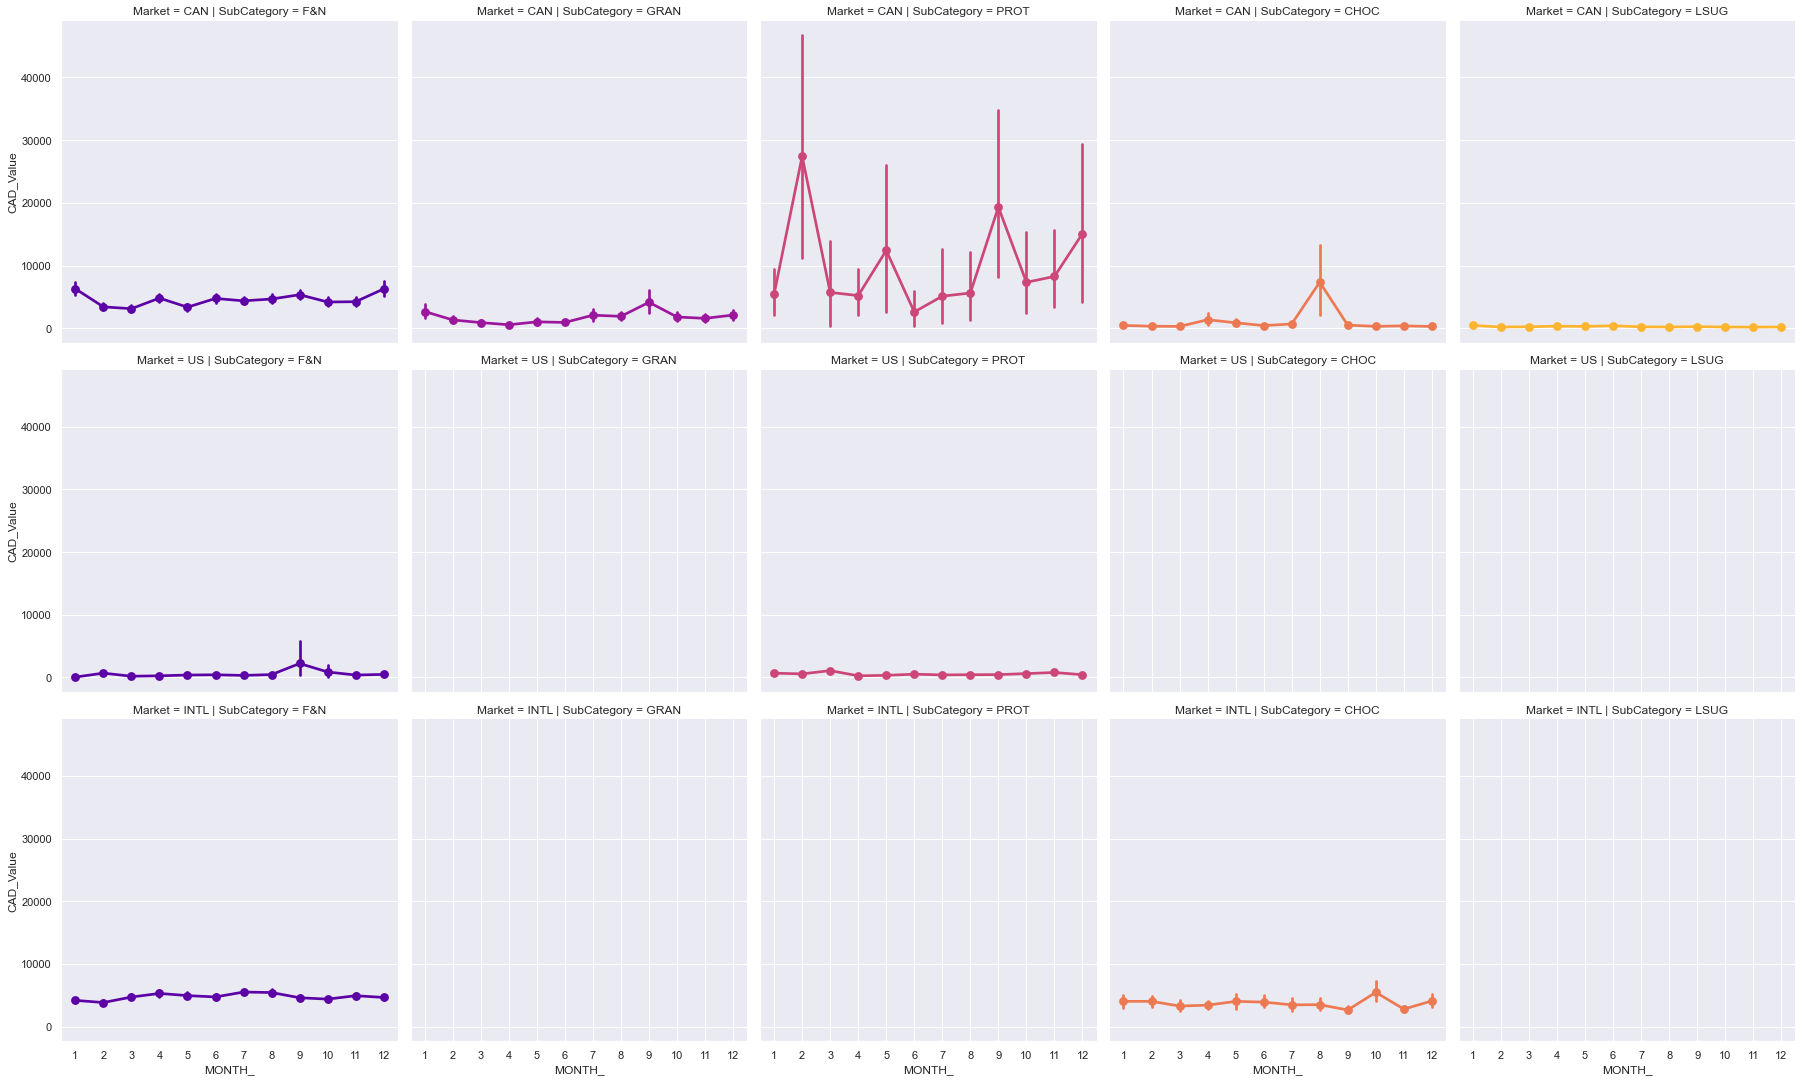

In [12]:
# sales trends
sns.factorplot(data = sales_df, x = 'MONTH_', y = "CAD_Value", 
               col = 'SubCategory', # per store type in cols
               palette = 'plasma',
               hue = 'SubCategory',
               row = 'Market')

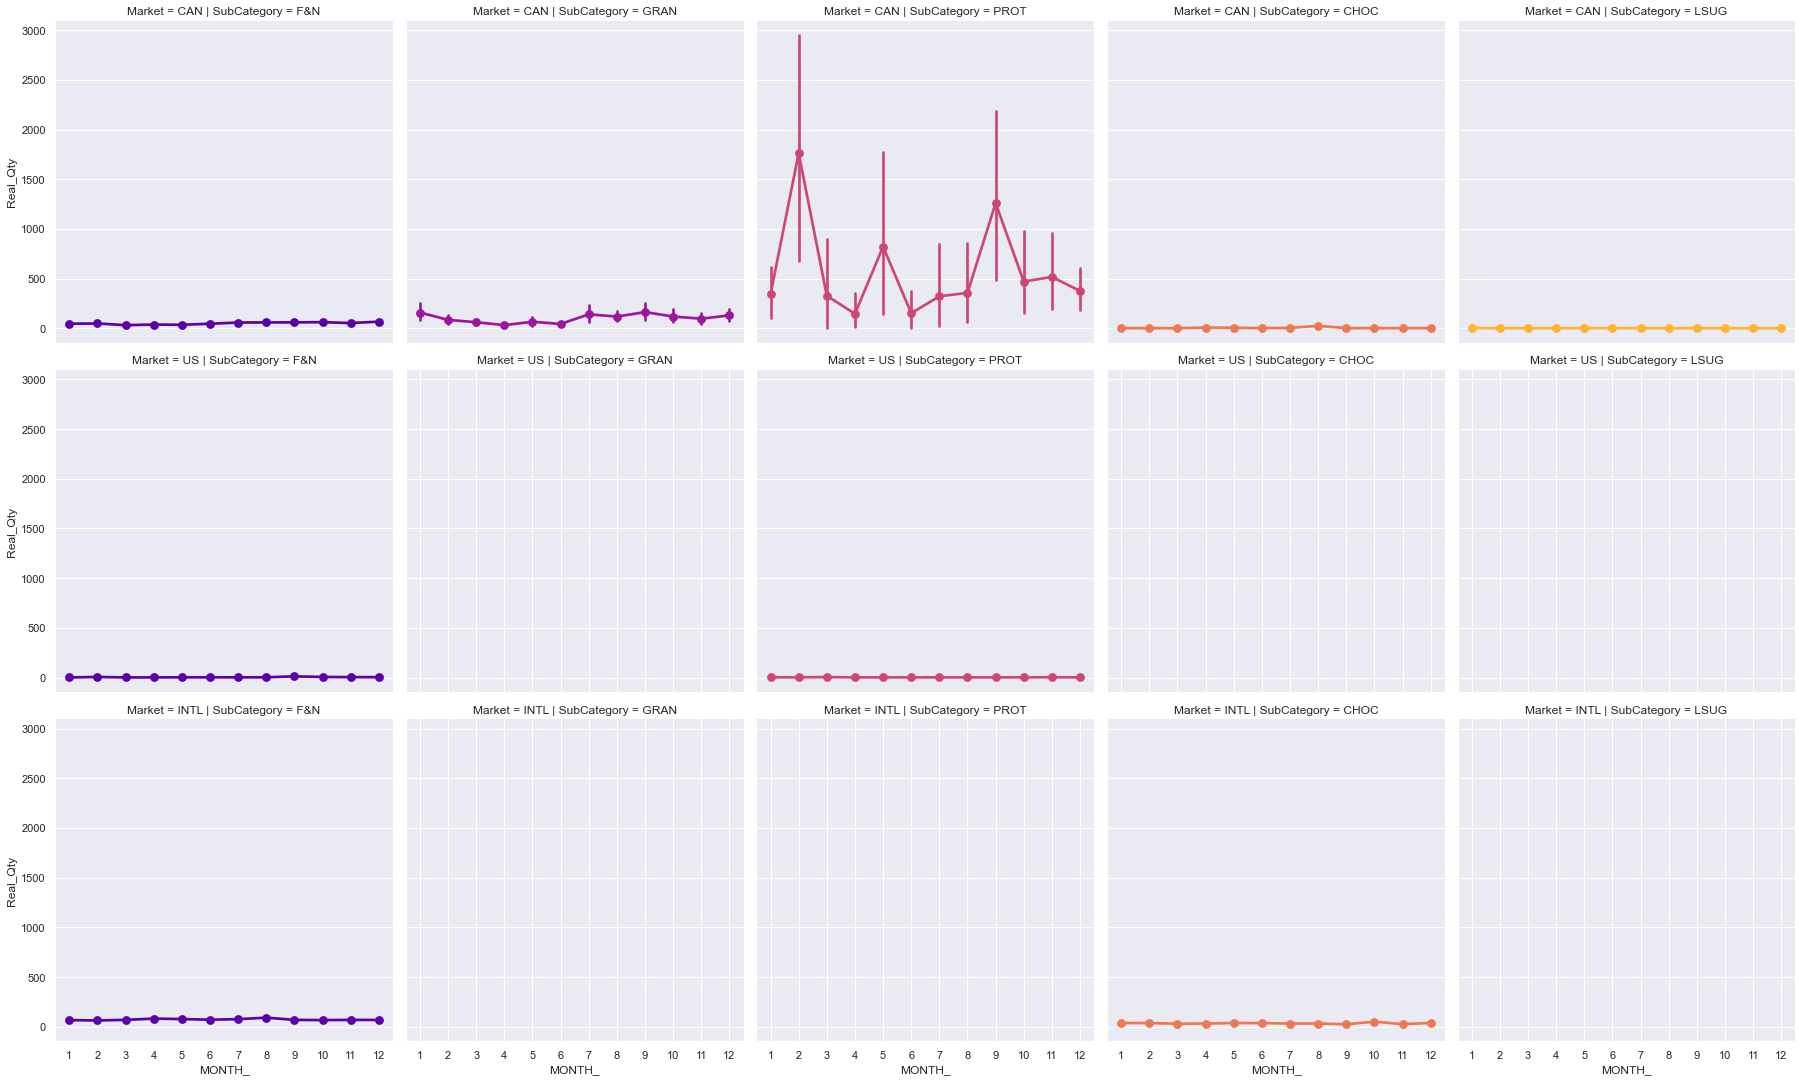

In [13]:
# sales trends
sns.factorplot(data = sales_df, x = 'MONTH_', y = "Real_Qty", 
               col = 'SubCategory', # per subcategory in cols
               palette = 'plasma',
               hue = 'SubCategory',
               row = 'Market')

In [14]:
# sales_df.loc["CAN","PROT","CAD_Value"] Trying to find our sales for CAN market and PROT subcategory

In [15]:
# sales for the CAN Market
sales = sales_df[sales_df.Market == "CAN"].loc[:,["InvDate","CAD_Value"]]

# reverse to the order: from 2013 to 2021
sales = sales.sort_index(ascending = False)

# to datetime64
sales['InvDate'] = pd.DatetimeIndex(sales['InvDate'])
sales.dtypes

InvDate      datetime64[ns]
CAD_Value           float64
dtype: object

In [16]:
# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'InvDate': 'ds',
                                'CAD_Value': 'y'})
sales.head()

,ds,y
35947,2021-06-29,28.9900
35946,2021-06-29,57.9800
35945,2021-06-29,4.9900
35944,2021-06-29,28.9900
35943,2021-06-29,"15,924.0000"


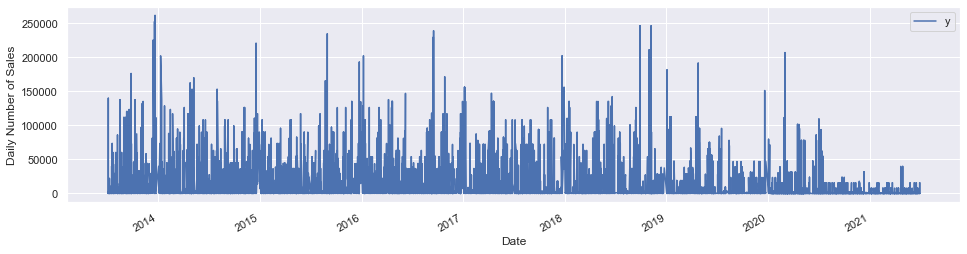

In [17]:
# Plot Daily Sales for CAN Market
ax = sales.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [18]:
# sales for the INTL Market
sales_INTL = sales_df[sales_df.Market == "INTL"].loc[:,["InvDate","CAD_Value"]]

# reverse to the order: from 2013 to 2021
sales_INTL = sales_INTL.sort_index(ascending = False)

# to datetime64
sales_INTL['InvDate'] = pd.DatetimeIndex(sales_INTL['InvDate'])
sales_INTL.dtypes

InvDate      datetime64[ns]
CAD_Value           float64
dtype: object

In [19]:
sales_INTL = sales_INTL.rename(columns = {'InvDate': 'ds',
                                'CAD_Value': 'y'})
sales_INTL.head()

,ds,y
35924,2021-06-28,"1,350.7200"
35923,2021-06-28,731.6400
35922,2021-06-28,"4,841.2056"
35921,2021-06-28,"5,071.7392"
35920,2021-06-28,"1,547.7000"


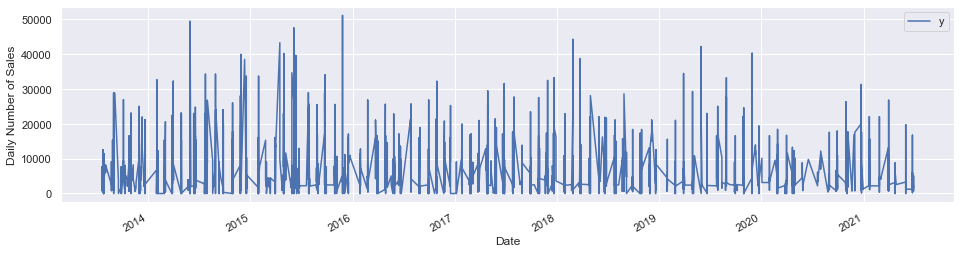

In [20]:
# Plot Daily Sales for INTL Market
ax = sales_INTL.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [21]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
# international sales to internation markets is done at the end of the year, hence the daily seasonality is set as false
my_model = Prophet(interval_width = 0.95, daily_seasonality=False)
my_model.fit(sales)

# dataframe that extends into future 6 weeks dataframe that extends into future 8 weeks 
future_dates = my_model.make_future_dataframe(periods = 8*7)

future_dates.tail(7)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,ds
1783,2021-08-18
1784,2021-08-19
1785,2021-08-20
1786,2021-08-21
1787,2021-08-22
1788,2021-08-23
1789,2021-08-24


In [22]:
# temporary increase in time frame for the forecast to see how the the results from the fbprofpher library change

# set the uncertainty interval to 95% (the Prophet default is 80%)
# international sales to internation markets is done at the end of the year, hence the daily seasonality is set as false
my_model = Prophet(interval_width = 0.95, daily_seasonality=False)
my_model.fit(sales)

# dataframe that extends into future 6 weeks dataframe that extends into future 8 weeks 
future_dates = my_model.make_future_dataframe(periods = 48*7)

future_dates.tail(7)

,ds
2063,2022-05-25
2064,2022-05-26
2065,2022-05-27
2066,2022-05-28
2067,2022-05-29
2068,2022-05-30
2069,2022-05-31


In [23]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
# yhat - forecast
# yhat_lower - lower limit
# yhat_upper - upper limit


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2063,2022-05-25,"-1,536.5253","-30,644.8318","24,394.7318"
2064,2022-05-26,144.2518,"-29,504.5113","30,528.8490"
2065,2022-05-27,678.5385,"-28,452.5356","29,315.2349"
2066,2022-05-28,67.8553,"-28,838.5115","29,773.9455"
2067,2022-05-29,"-1,200.0949","-28,979.1593","26,913.7440"
2068,2022-05-30,-325.1666,"-31,976.1590","29,807.6552"
2069,2022-05-31,-422.6781,"-31,289.7240","28,475.2848"


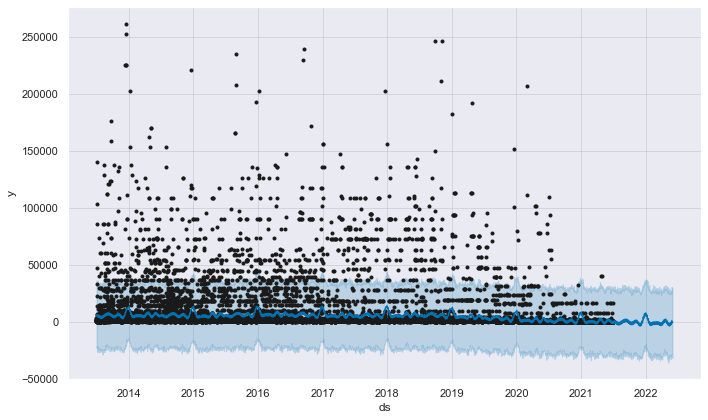

In [24]:
my_model.plot(forecast);

In [25]:
# predictions for 8 weeks only

forecast = my_model.predict(future_dates)

# preditions for last week
# yhat - forecast
# yhat_lower - lower limit
# yhat_upper - upper limit


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2063,2022-05-25,"-1,536.5253","-33,025.3722","27,649.8395"
2064,2022-05-26,144.2518,"-29,456.2542","31,496.8197"
2065,2022-05-27,678.5385,"-28,381.5291","29,759.7830"
2066,2022-05-28,67.8553,"-28,590.8328","31,163.1399"
2067,2022-05-29,"-1,200.0949","-32,513.5109","28,540.7794"
2068,2022-05-30,-325.1666,"-31,005.2043","28,354.5932"
2069,2022-05-31,-422.6781,"-29,536.5465","29,639.8678"


In [26]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

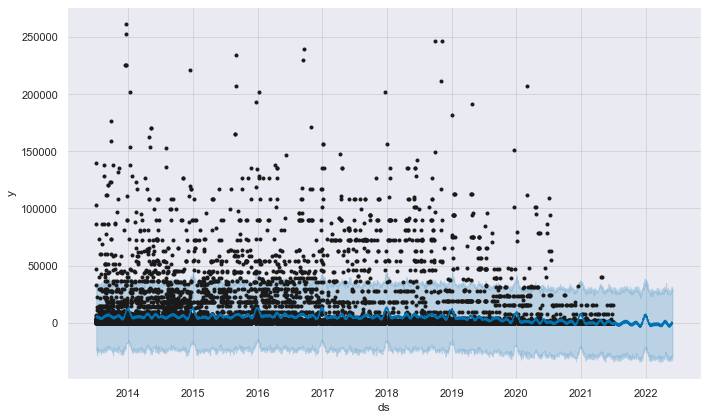

In [27]:
# visualizing predicions
# gives the preidction of what should happen. 
# Black - what has actually happned - yhat
# blue - uncertainly level
# based on the chart below, the model may not be working when data is split between the three marketing. 
# 'fpprofit' may nor may not be the best model to use, further analysis would need to be done here. 

my_model.plot(forecast);

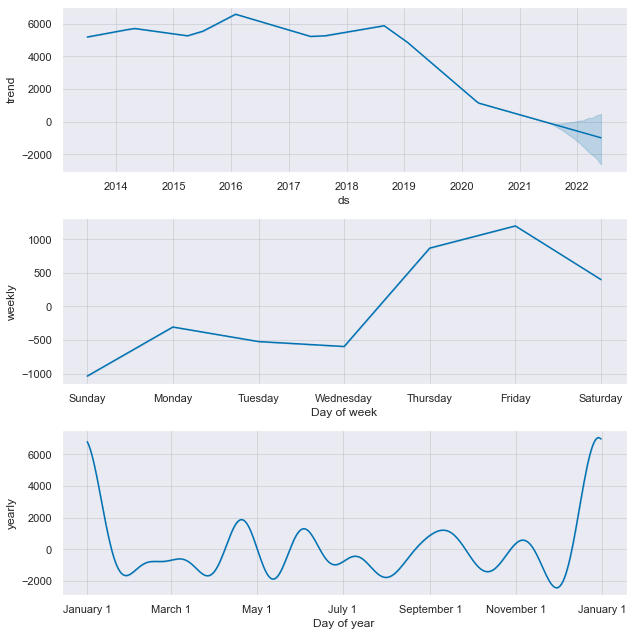

In [28]:

my_model.plot_components(forecast);

In [29]:
# set the uncertainty interval to 95% for INTL Market (the Prophet default is 80%)
my_model_INTL = Prophet(interval_width = 0.95, daily_seasonality=False)
my_model_INTL.fit(sales_INTL)

# dataframe that extends into future 6 weeks dataframe that extends into future 8 weeks 
future_dates_INTL = my_model_INTL.make_future_dataframe(periods = 8*7)

future_dates_INTL.tail(7)

,ds
428,2021-08-17
429,2021-08-18
430,2021-08-19
431,2021-08-20
432,2021-08-21
433,2021-08-22
434,2021-08-23


In [30]:
# predictions for INTL market
forecast_INTL = my_model_INTL.predict(future_dates_INTL)

# preditions for last week
forecast_INTL[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
428,2021-08-17,"5,045.3074","-5,389.7888","15,089.4150"
429,2021-08-18,"5,598.4961","-4,395.2946","14,884.1955"
430,2021-08-19,"4,687.9284","-5,300.8048","14,887.4565"
431,2021-08-20,"4,805.8891","-5,247.4843","15,801.5012"
432,2021-08-21,"3,107.6458","-7,179.0452","12,816.1730"
433,2021-08-22,"3,071.6986","-6,990.6366","13,469.2934"
434,2021-08-23,"4,400.4712","-5,107.1651","14,321.0684"


In [31]:
fc_INTL = forecast_INTL[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

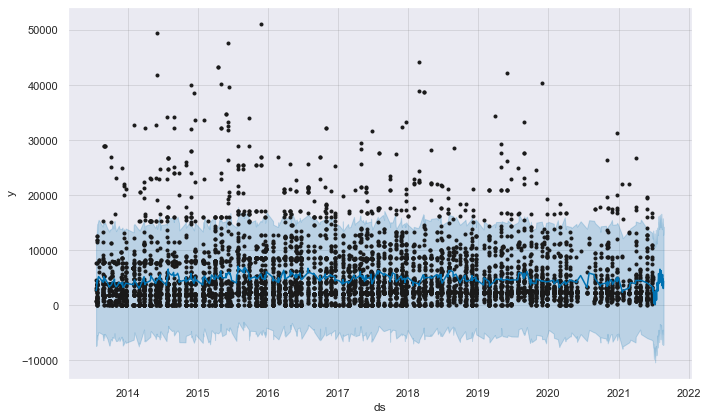

In [32]:
# visualizing predicions
my_model_INTL.plot(forecast_INTL);

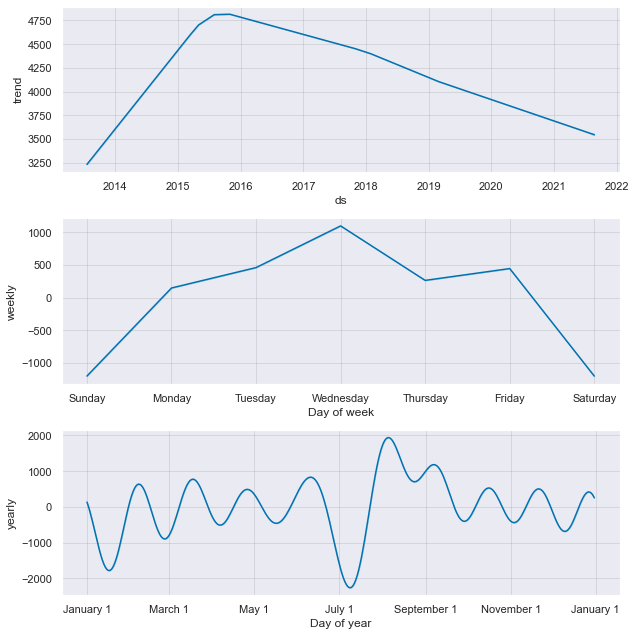

In [33]:

my_model_INTL.plot_components(forecast_INTL);

In [34]:
# sales for the US Market
sales_US = sales_df[sales_df.Market == "US"].loc[:,["InvDate","CAD_Value"]]

# reverse to the order: from 2013 to 2021
sales_US = sales_US.sort_index(ascending = False)

# to datetime64
sales_US['InvDate'] = pd.DatetimeIndex(sales_US['InvDate'])
sales_US.dtypes

InvDate      datetime64[ns]
CAD_Value           float64
dtype: object

In [35]:
sales_US = sales_US.rename(columns = {'InvDate': 'ds',
                                'CAD_Value': 'y'})
sales_US.head()

,ds,y
18889,2017-06-15,0.0000
18888,2017-06-15,0.0000
18884,2017-06-15,0.0000
18881,2017-06-15,0.0000
18102,2017-04-17,0.0000


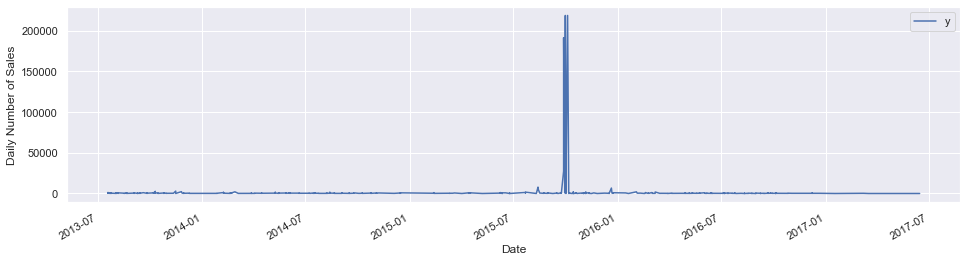

In [36]:
# Plot Daily Sales for US Market
ax = sales_US.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [37]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model_US = Prophet(interval_width = 0.95, daily_seasonality=False)
my_model_US.fit(sales_US)

# dataframe that extends into future 6 weeks dataframe that extends into future 8 weeks 
future_dates_US = my_model_US.make_future_dataframe(periods = 8*7)

future_dates_US.tail(7)

,ds
250,2017-08-04
251,2017-08-05
252,2017-08-06
253,2017-08-07
254,2017-08-08
255,2017-08-09
256,2017-08-10


In [38]:
# predictions for US market
forecast_US = my_model_US.predict(future_dates_US)

# preditions for last week
forecast_US[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
250,2017-08-04,"-1,162.1981","-19,660.7668","15,800.6784"
251,2017-08-05,-525.5606,"-18,288.4888","17,261.4723"
252,2017-08-06,-305.8957,"-17,732.2079","16,382.1995"
253,2017-08-07,"3,221.0082","-15,032.9240","21,037.1528"
254,2017-08-08,-160.3053,"-17,826.4704","17,017.1141"
255,2017-08-09,"-1,494.4195","-19,498.0290","17,284.1279"
256,2017-08-10,825.7577,"-16,189.2651","18,873.5044"


In [39]:
fc_US = forecast_US[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

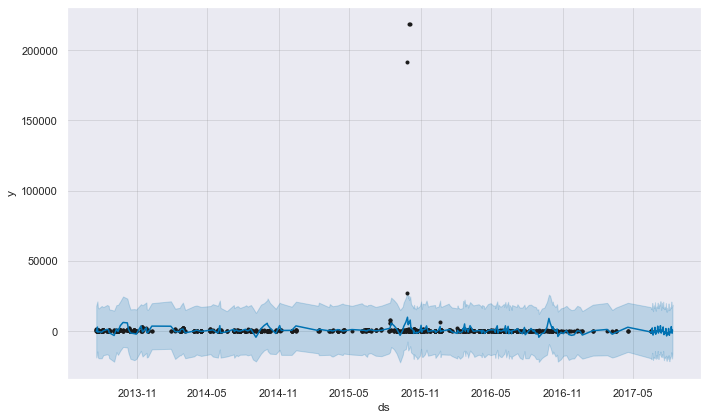

In [40]:
# visualizing predicions
my_model_US.plot(forecast_US);

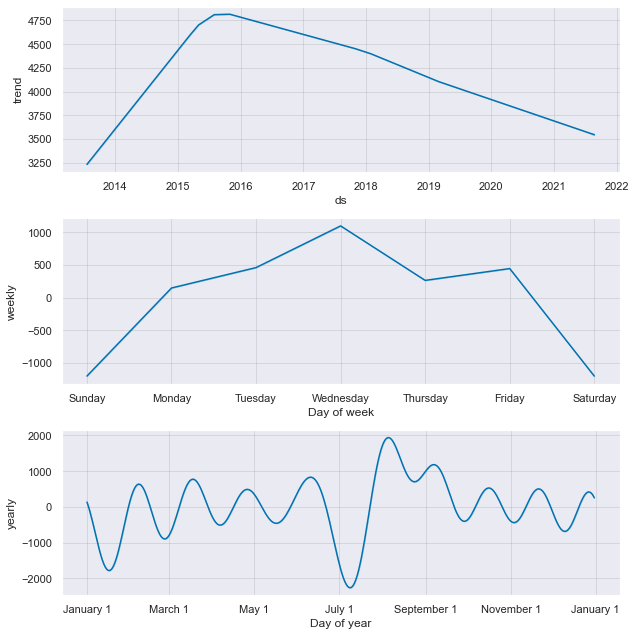

In [41]:
my_model_INTL.plot_components(forecast_INTL);

In [42]:
# Forecasting Using ARIMA

In [43]:
# Load additional dependancies for ARIMA

from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import read_csv

import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


In [44]:
# Loading the date set to be uses for forecasting
file_path = "Sales_Data - Only the columns we need.csv"
sales_df = pd.read_csv(file_path)
sales_df.head()


,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,07/04/2013,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [45]:

# Check for any missing values in sales_df
sales_df.isnull().values.any()

False

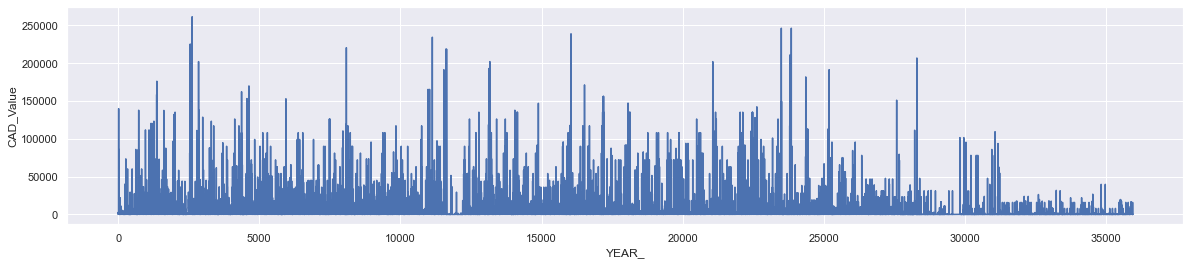

In [46]:
# Exploratory Analysis

# Using sales for all the years that avalible in the dateset

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('YEAR_')
ax.set_ylabel('CAD_Value')
plt.plot(sales_df.index, sales_df['CAD_Value']);



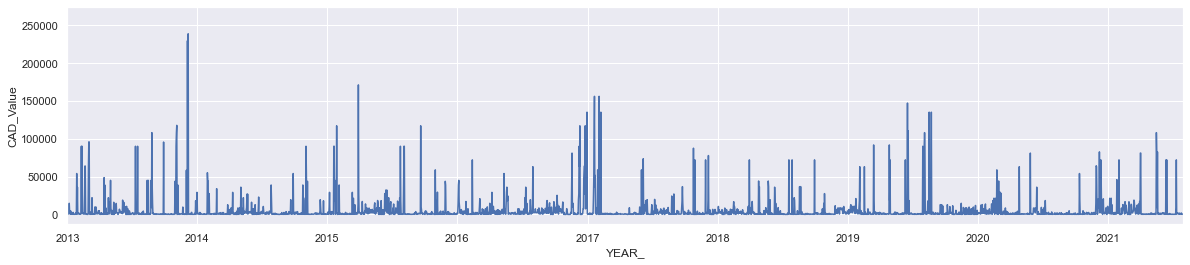

In [47]:
# Explore sales data from the most recent year


# define start and end years

start = datetime.datetime(2013,1,1)
end = datetime.datetime(2021,8,1)


plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('YEAR_')
ax.set_ylabel('CAD_Value')
plt.plot(sales_df.index, sales_df['CAD_Value']);


# Need to check the invoice date value 

In [48]:
sales_df.shape

(35948, 16)

In [49]:
# The data is of a particular time period. 
# To read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

In [50]:
sales_df = pd.read_csv(file_path, parse_dates=['InvDate'], date_parser = dateparse)
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [51]:
sales_df.shape

(35948, 16)

In [52]:
sales_df.describe()

,YEAR_,MONTH_,Product,Real_Qty,CAD_Value
count,"35,948.0000","35,948.0000","35,948.0000","35,948.0000","35,948.0000"
mean,"2,016.8881",6.5288,"600,743.3911",60.0658,"4,029.2229"
std,2.5006,3.2983,313.4058,327.3413,"13,568.9165"
min,"2,013.0000",1.0000,"600,007.0000",1.0000,0.0000
25%,"2,015.0000",4.0000,"600,627.0000",2.0000,130.7000
50%,"2,017.0000",6.0000,"600,773.5000",5.0000,490.5600
75%,"2,019.0000",9.0000,"600,919.0000",28.0000,"2,105.5760"
max,"2,021.0000",12.0000,"601,307.0000","11,520.0000","261,584.6400"


In [53]:

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR_        35948 non-null  int64         
 1   MONTH_       35948 non-null  int64         
 2   InvDate      35948 non-null  datetime64[ns]
 3   InvNumber    35948 non-null  object        
 4   Market       35948 non-null  object        
 5   InvCustomer  35948 non-null  object        
 6   CompanyName  35948 non-null  object        
 7   ItemClass    35948 non-null  object        
 8   SubCategory  35948 non-null  object        
 9   Flavours     35948 non-null  object        
 10  Product      35948 non-null  int64         
 11  Description  35948 non-null  object        
 12  Config       35948 non-null  object        
 13  UOM          35948 non-null  object        
 14  Real_Qty     35948 non-null  int64         
 15  CAD_Value    35948 non-null  float64       
dtypes: d

In [54]:
sales_df.isna().sum()

YEAR_          0
MONTH_         0
InvDate        0
InvNumber      0
Market         0
InvCustomer    0
CompanyName    0
ItemClass      0
SubCategory    0
Flavours       0
Product        0
Description    0
Config         0
UOM            0
Real_Qty       0
CAD_Value      0
dtype: int64

In [55]:
sales_df.groupby('SubCategory')['CAD_Value'].describe()

,count,mean,std,min,25%,50%,75%,max
SubCategory,,,,,,,,
CHOC,"1,102.0000","2,182.6657","5,869.2311",0.0000,268.1800,536.3600,"2,395.8264","95,988.0000"
F&N,"30,261.0000","4,399.6510","14,199.5907",0.0000,134.0900,536.3600,"2,227.4560","261,584.6400"
GRAN,"3,388.0000","1,538.4345","6,225.9932",0.0000,9.1000,34.5600,777.6000,"94,027.2000"
LSUG,647.0000,278.9067,407.2594,0.0000,100.8000,201.1400,302.4000,"6,350.4000"
PROT,550.0000,"7,103.0887","23,553.7860",0.0000,166.4000,456.7680,998.4000,"176,256.0000"


In [56]:
sales_df.groupby('SubCategory')['Real_Qty','CAD_Value'].sum()
#sales.df.groupby('Market')['Customers', 'Sales'].sum()

,Real_Qty,CAD_Value
SubCategory,,
CHOC,19222,"2,405,297.6046"
F&N,1609668,"133,137,839.6553"
GRAN,304879,"5,212,216.0100"
LSUG,1802,"180,452.6500"
PROT,223674,"3,906,698.7880"


In [57]:
# sales for the CAN Market
sales = sales_df[sales_df.Market == "CAN"].loc[:,["InvDate","CAD_Value"]]

# reverse to the order: from 2013 to 2021
sales = sales.sort_index(ascending = False)

# to datetime64
sales['InvDate'] = pd.DatetimeIndex(sales['InvDate'])
sales.dtypes

InvDate      datetime64[ns]
CAD_Value           float64
dtype: object

In [58]:
# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'InvDate': 'ds',
                                'CAD_Value': 'y'})
sales.head()

,ds,y
35947,2021-06-29,28.9900
35946,2021-06-29,57.9800
35945,2021-06-29,4.9900
35944,2021-06-29,28.9900
35943,2021-06-29,"15,924.0000"


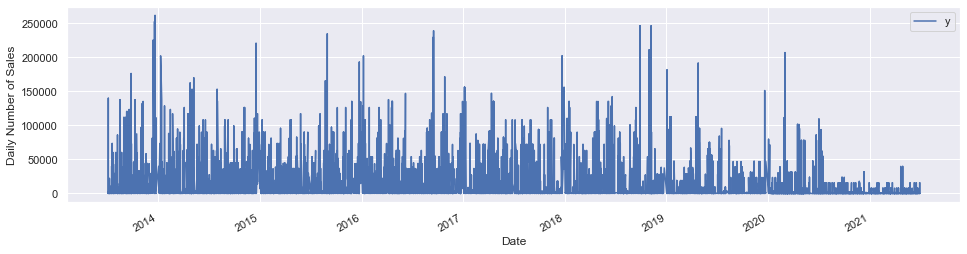

In [59]:

# Plot Daily Sales for CAN Market
ax = sales.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [60]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)
    if df_results[0] < df_test[4]["5%"]:
        print("Reject Ho -- Time Series is Stationary.")
    else:
        print('Failed to Reject Ho -- Time Series is Stationary.')

In [61]:

# Converting dataframe to Series
Sales_series = pd.Series(sales_df.Real_Qty,index = sales_df.index)
type(Sales_series)

pandas.core.series.Series

In [62]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)
    if df_results[0] < df_test[4]["5%"]:
        print("Reject Ho -- Time Series is Stationary.")
    else:
        print('Failed to Reject Ho -- Time Series is Stationary.')

In [63]:

adfuller_test(Sales_series)

Test Statistic                     -21.7423
p-value                              0.0000
Lags                                51.0000
Observations                    35,896.0000
Critical Value (1%)                 -3.4305
Critical Value (5%)                 -2.8616
Critical Value (10%)                -2.5668
dtype: float64
Reject Ho -- Time Series is Stationary.


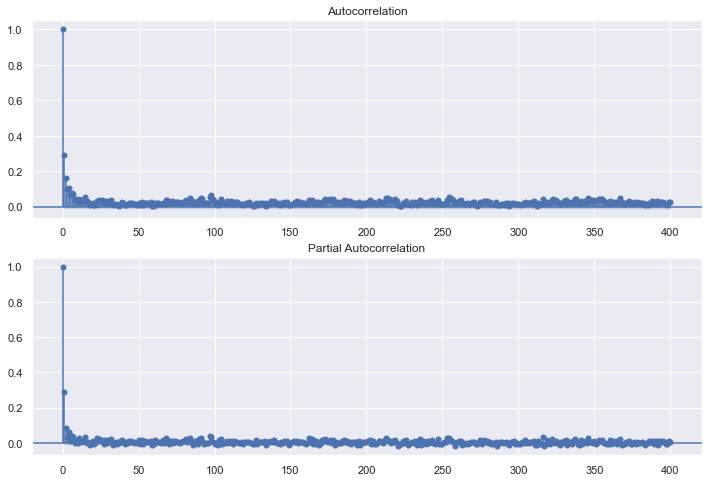

In [64]:
import statsmodels.api as sm  
# ACF, PACF graphs to help determine order of ARIMA model
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Sales_series, lags=400, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Sales_series, lags=400, ax=ax2)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [66]:
# the sales df from code above

In [67]:
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [68]:
from statsmodels.tsa.stattools import adfuller, kpss



In [69]:
#  find the order of differencing (d) in ARIMA model


In [70]:
#test
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(sales_df.CAD_Value, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -20.946387921123904
p-value: 0.0
Critial Values:
   1%, -3.430532176379305
Critial Values:
   5%, -2.8616205175212093
Critial Values:
   10%, -2.5668128569349125


In [71]:
# KPSS Test
result = kpss(sales_df.CAD_Value, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 10.717136
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Shay\.conda\envs\PythonData\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


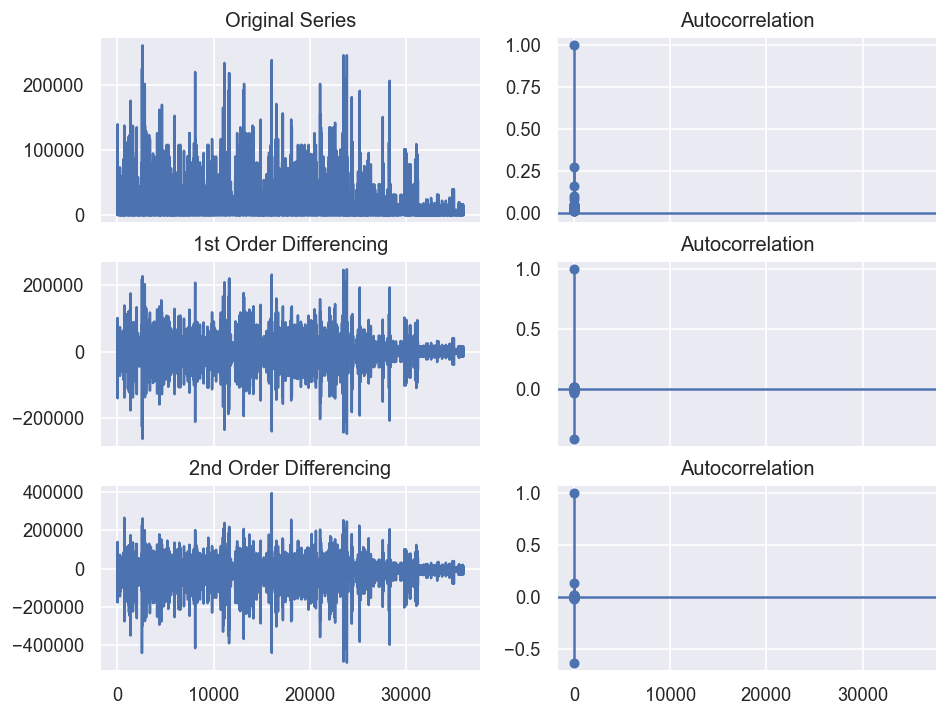

In [72]:
#Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(sales_df.CAD_Value); axes[0, 0].set_title('Original Series')
plot_acf(sales_df.CAD_Value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sales_df.CAD_Value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sales_df.CAD_Value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sales_df.CAD_Value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sales_df.CAD_Value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


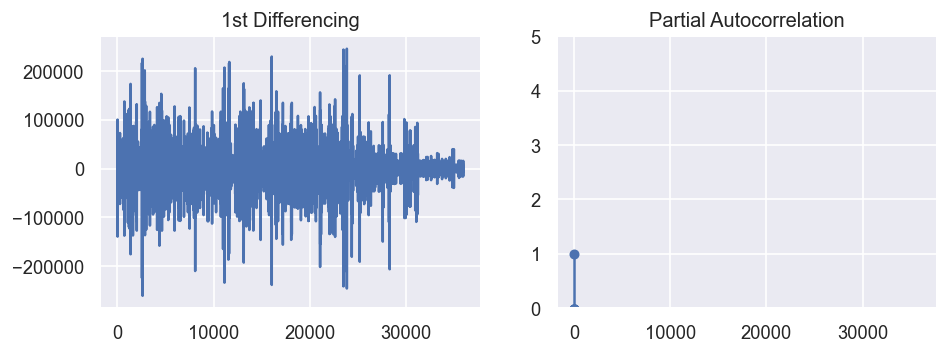

In [73]:
#find the order of the AR term (p)

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sales_df.CAD_Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(sales_df.CAD_Value.diff().dropna(), ax=axes[1])

plt.show()




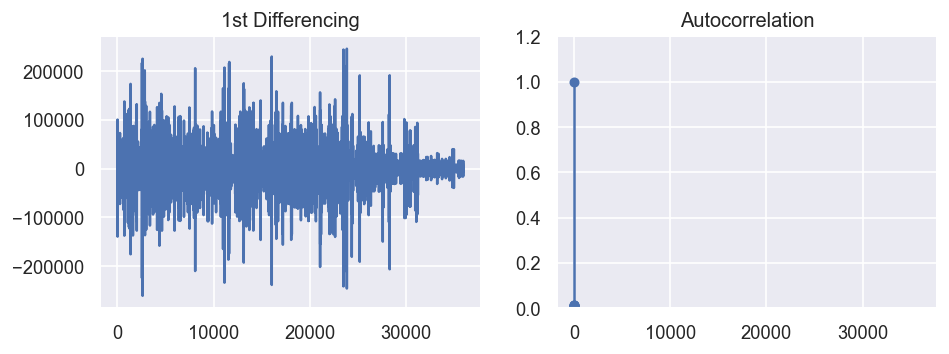

In [74]:
#How to find the order of the MA term (q)
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sales_df.CAD_Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(sales_df.CAD_Value.diff().dropna(), ax=axes[1])

plt.show()

In [75]:
# Building the model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(sales_df.CAD_Value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())



                             ARIMA Model Results                              
Dep. Variable:            D.CAD_Value   No. Observations:                35947
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -391337.320
Method:                       css-mle   S.D. of innovations          12932.445
Date:                Thu, 16 Sep 2021   AIC                         782684.640
Time:                        23:23:13   BIC                         782727.089
Sample:                             1   HQIC                        782698.144
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0983      0.109     -0.901      0.368      -0.312       0.116
ar.L1.D.CAD_Value     0.5863      0.007     88.942      0.000       0.573       0.599
ma.L1.D.CAD_Value    -1.

In [79]:
# build the model without MA.2
# 1,1,1 ARIMA Model
model = ARIMA(sales_df.CAD_Value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.CAD_Value   No. Observations:                35947
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -391484.366
Method:                       css-mle   S.D. of innovations          12985.747
Date:                Thu, 16 Sep 2021   AIC                         782976.732
Time:                        23:34:06   BIC                         783010.692
Sample:                             1   HQIC                        782987.536
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0741      0.615     -0.120      0.904      -1.280       1.132
ar.L1.D.CAD_Value     0.2552      0.006     45.262      0.000       0.244       0.266
ma.L1.D.CAD_Value    -0.

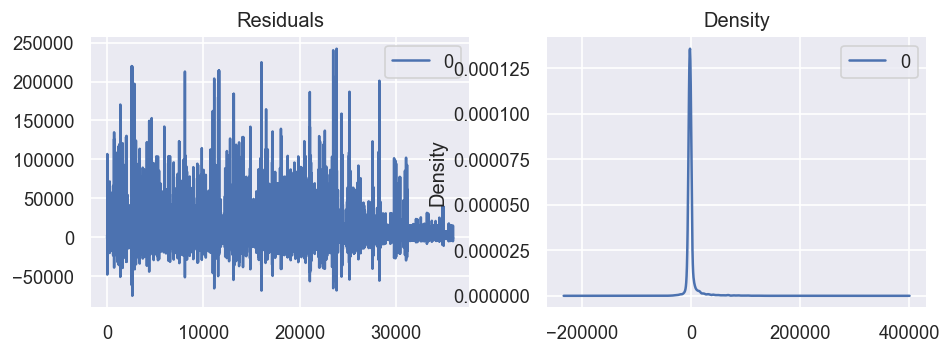

In [80]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

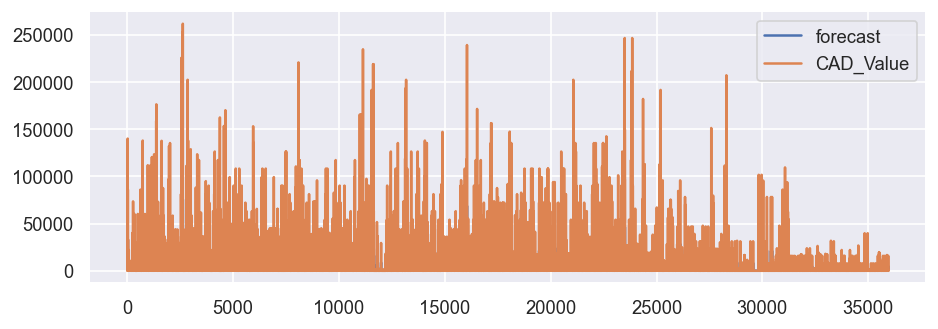

In [81]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
# do Auto Arima Forecast in Python

In [84]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(sales_df.CAD_Value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=783885.824, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=789183.850, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=784936.789, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=785961.530, Time=0.69 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=8.49 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=783334.114, Time=5.00 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=784999.422, Time=1.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=17.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=782943.170, Time=11.04 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=784638.451, Time=1.63 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=26.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=782980.900, Time=7.60 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 81.519 seconds
                               SARIMAX Results                                
De

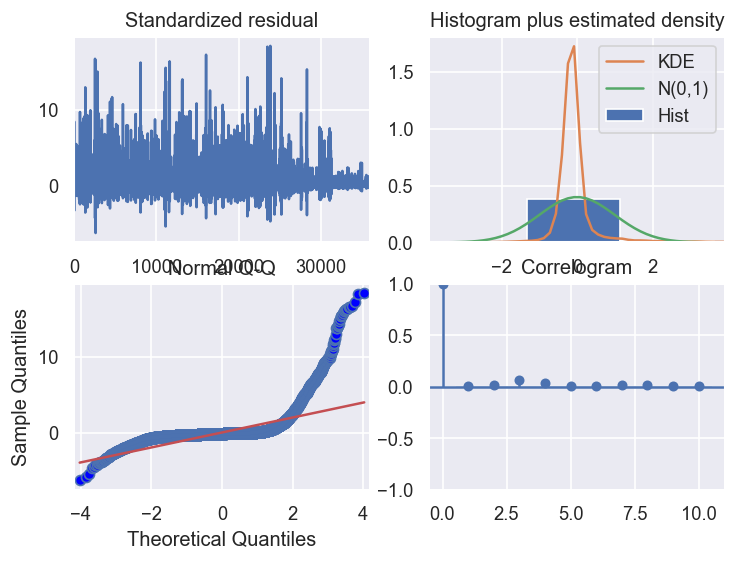

In [85]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

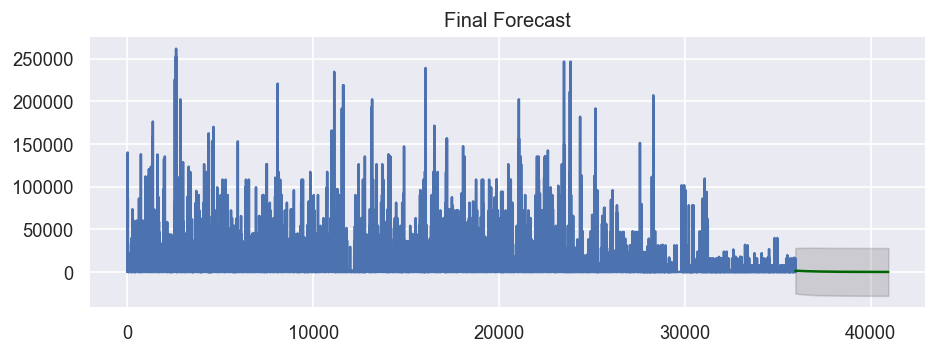

In [88]:
# Forecast
n_periods = 5000
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(sales_df.CAD_Value), len(sales_df.CAD_Value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(sales_df.CAD_Value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [98]:
# number of columsn in the data frame
len(sales_df.columns)

16

In [99]:
# pandas drop columns using list of column names
sales_df.drop(['YEAR_', 'MONTH_', 'InvNumber', 'Market', 'InvCustomer', 'CompanyName', 'ItemClass', 'SubCategory', 
              'Flavours', 'Product', 'Description', 'Config', 'UOM', 'Real_Qty'], axis=1)

,InvDate,CAD_Value
0,2013-07-04,153.6000
1,2013-07-04,"2,731.5200"
2,2013-07-04,460.8000
3,2013-07-04,307.2000
4,2013-07-04,614.4000
...,...,...
35943,2021-06-29,"15,924.0000"
35944,2021-06-29,28.9900
35945,2021-06-29,4.9900
35946,2021-06-29,57.9800


In [102]:
# Updating the header
sales_df.columns=["InvDate","CAD_Value"]
sales_df.head()
sales_df.describe()
sales_df.set_index('InvDate',inplace=False)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

ValueError: Length mismatch: Expected axis has 16 elements, new values have 2 elements